.. _nb_kktpm:

## Karush Kuhn Tucker Proximity Measure (KKTPM)




In 2016, Deb and Abouhawwash proposed Karush Kuhn Tucker Proximity Measure (KKTPM) <cite data-cite="kktpm1"></cite>, a metric that can measure how close a point is from being “an optimum”. The smaller the metric, the closer the point. This does not require the Pareto front to be known, but the gradient information needs to be approximated.
Their metric applies to both single objective and multi-objective optimization problems. 

In a single objective problem, the metric shows how close a point is from being a “local optimum”, while in multi-objective problems, the metric shows how close a point is from being a “local Pareto point”. Exact calculations of KKTPM for each point requires solving a whole optimization problem, which is extremely time-consuming. To avoid this problem, the authors of the original work again proposed several approximations to the true KKTPM, namely Direct KKTPM, Projected KKTPM, Adjusted KKTPM, and Approximate KKTPM. Approximate KKTPM is simply the average of the former three and is what we call simply “KKTPM”. Moreover, they were able to show that Approximate KKTPM is reliable and can be used in place of the exact one <cite data-cite="kktpm2"></cite>.

<div style="display: block;margin-left: auto;margin-right: auto;width: 50%;">
![nsga2_crowding](../resources/images/kktpm.png)
</div>

Let us now see how to use pymoo to calculate the KKTPM for point:

In [1]:
from pymoo.factory import get_problem
from pymoo.problems.autodiff import AutomaticDifferentiation
from pymoo.problems.bounds_as_constr import BoundariesAsConstraints

problem = AutomaticDifferentiation(BoundariesAsConstraints(get_problem("zdt1", n_var=30)))

For instance, the code below calculates the KKTPM metric for randomly sampled points for the given an example;

In [2]:
from pymoo.indicators.kktpm import KKTPM
from pymoo.operators.sampling.rnd import FloatRandomSampling

X = FloatRandomSampling().do(problem, 100).get("X")
kktpm = KKTPM().calc(X, problem)

Moreover, a whole run of a genetic algorithm can be analyzed by storing each generation's history and then calculating the KKTPM metric for each of the points:

In [3]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.factory import get_problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
from pymoo.core.evaluator import Evaluator


algorithm = NSGA2(pop_size=100, eliminate_duplicates=True)

# make sure each evaluation also has the derivatives - necessary for KKTPM
evaluator = Evaluator(evaluate_values_of=["F", "CV", "G", "dF", "dG"])

res = minimize(problem,
               algorithm,
               ('n_gen', 100),
               evaluator=evaluator,
               seed=1,
               save_history=True,
               verbose=False)


Compiled modules for significant speedup can not be used!
https://pymoo.org/installation.html#installation

To disable this warning:
from pymoo.config import Config
Config.show_compile_hint = False



In [4]:
import numpy as np
gen, _min, _median, _max = [], [], [], []

for algorithm in res.history:
    if algorithm.n_gen % 5 == 0:
        X = algorithm.pop.get("X")
        kktpm = KKTPM().calc(X, problem)

        gen.append(algorithm.n_gen)
        _min.append(kktpm.min())
        _median.append(np.median(kktpm))
        _max.append(kktpm.max())

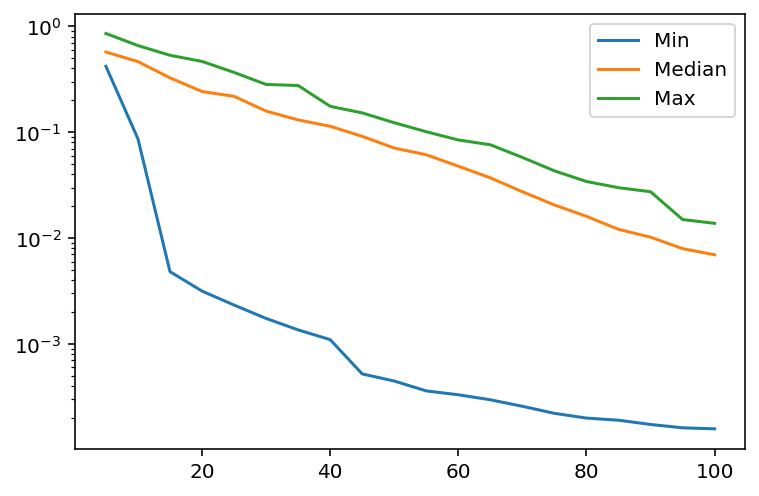

In [5]:
import matplotlib.pyplot as plt

plt.plot(gen, _min, label="Min")
plt.plot(gen, _median, label="Median")
plt.plot(gen, _max, label="Max")
plt.yscale("log")
plt.legend()
plt.show()